In [13]:
import importlib
from __imports__ import *
import data, LSTM_returns, optimization
importlib.reload(data)

<module 'data' from 'c:\\Users\\27904\\OneDrive\\桌面\\crypto\\AAA_Thursday1\\data\\__init__.py'>

In [14]:
DOGE = data.load_asset('DOGEUSDT', sampling='1d')
DOGE = data.add_fear_and_greed(DOGE)
DOGE = DOGE[DOGE.index >= '2022-01-01']

In [27]:
BTC = data.load_asset('BTCUSDT', sampling='1d')
BTC = data.add_fear_and_greed(BTC)
# Restrict data after 2022
BTC = BTC[BTC.index >= '2022-01-01']
BTC.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Quote asset volume',
       'Number of trades', 'Taker buy base asset volume',
       'Taker buy quote asset volume', 'F&G', 'F&G category'],
      dtype='object')

In [16]:
SOL = data.load_asset('SOLUSDT', sampling='1d')
SOL = data.add_fear_and_greed(SOL)
# Restrict data after 2022
SOL = SOL[SOL.index >= '2022-01-01']

In [17]:
ETH = data.load_asset('ETHUSDT', sampling='1d')
ETH = data.add_fear_and_greed(ETH)
# Restrict data after 2022
ETH = ETH[ETH.index >= '2022-01-01']

In [33]:
XRP = data.load_asset('XRPUSDT', sampling='1d')
XRP = data.add_fear_and_greed(XRP)
# Restrict data after 2022
XRP = XRP[XRP.index >= '2022-01-01']
XRP.tail()

,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,F&G,F&G category
Open time,,,,,,,,,,,
2025-03-27,2.3494,2.3900,2.3021,2.3410,121906802.0,2.865171e+08,940315,60473620.0,1.421305e+08,40.0,Fear
2025-03-28,2.3411,2.3433,2.1535,2.2073,211389681.0,4.705248e+08,1469290,105639152.0,2.350883e+08,44.0,Fear
2025-03-29,2.2072,2.2267,2.0607,2.1351,188344703.0,3.995656e+08,1392395,91627450.0,1.943217e+08,26.0,Fear
2025-03-30,2.1352,2.2142,2.1077,2.1369,143436566.0,3.095568e+08,1092491,71435902.0,1.541902e+08,32.0,Fear
2025-03-31,2.1371,2.1415,2.0238,2.0899,225359911.0,4.704750e+08,1771277,114012792.0,2.380228e+08,34.0,Fear


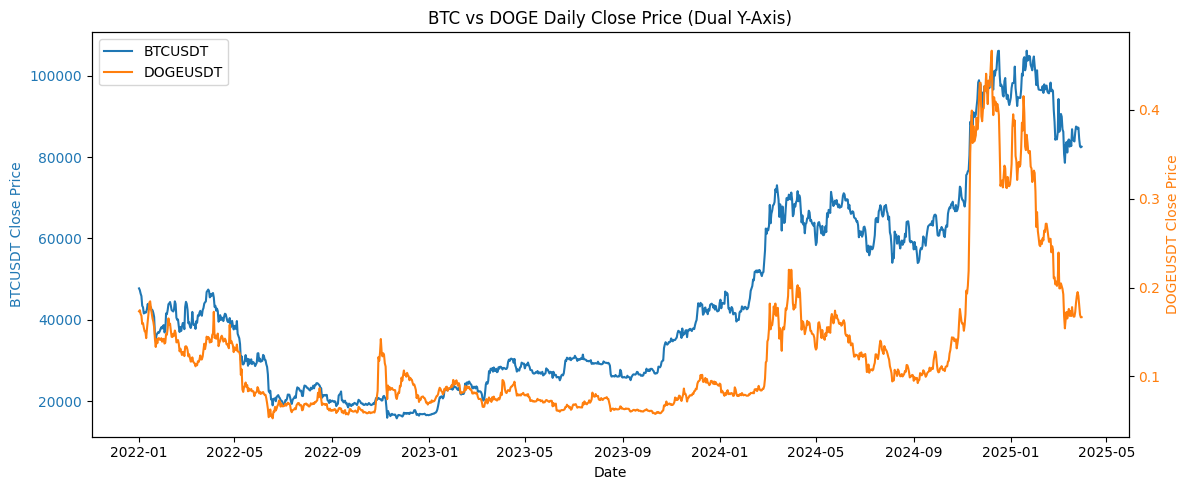

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1) Plot BTC & DOGE price series ----------------------------------------

import matplotlib.pyplot as plt

# Ensure your BTC and DOGE DataFrames are loaded and indexed by date
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot BTC on the left y-axis
color_btc = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('BTCUSDT Close Price', color=color_btc)
ax1.plot(BTC.index, BTC['Close'], color=color_btc, label='BTCUSDT')
ax1.tick_params(axis='y', labelcolor=color_btc)

# Create a second y-axis for DOGE
ax2 = ax1.twinx()
color_doge = 'tab:orange'
ax2.set_ylabel('DOGEUSDT Close Price', color=color_doge)
ax2.plot(DOGE.index, DOGE['Close'], color=color_doge, label='DOGEUSDT')
ax2.tick_params(axis='y', labelcolor=color_doge)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title("BTC vs DOGE Daily Close Price (Dual Y-Axis)")
fig.tight_layout()
plt.show()


In [25]:
df_close = pd.DataFrame({
    'BTC':  BTC['Close'],
    'DOGE': DOGE['Close'],
    'ETH':  ETH['Close'],
    'SOL':  SOL['Close'],
    'XRP':  XRP['Close']
}).dropna()

corr_all = df_close.corr()

In [30]:
# numeric Fear & Greed column name – adjust if yours differs:
fg_col = 'F&G'

# grab the index series (should be same across assets)
fg_index = BTC[fg_col].reindex(df_close.index)

# high‐greed regime (>65)
mask_high = fg_index > 65
corr_high = df_close.loc[mask_high].corr()
print("\nCorrelation (F&G > 70):")
display(corr_high)

# fear regime (<45)
mask_low  = fg_index < 45
corr_low  = df_close.loc[mask_low].corr()
print("\nCorrelation (F&G < 39):")
display(corr_low)


Correlation (F&G > 70):


,BTC,DOGE,ETH,SOL,XRP
BTC,1.000000,0.929390,0.754213,0.946841,0.770458
DOGE,0.929390,1.000000,0.609060,0.844351,0.817928
ETH,0.754213,0.609060,1.000000,0.789011,0.356870
SOL,0.946841,0.844351,0.789011,1.000000,0.601580
XRP,0.770458,0.817928,0.356870,0.601580,1.000000



Correlation (F&G < 39):


,BTC,DOGE,ETH,SOL,XRP
BTC,1.000000,0.794009,0.628597,0.894077,0.825552
DOGE,0.794009,1.000000,0.691437,0.789575,0.799387
ETH,0.628597,0.691437,1.000000,0.844838,0.315536
SOL,0.894077,0.789575,0.844838,1.000000,0.594334
XRP,0.825552,0.799387,0.315536,0.594334,1.000000


In [31]:
display_pretty_corr(corr_high, "Correlation (F&amp;G > 65)")
display_pretty_corr(corr_low,  "Correlation (F&amp;G < 45)")

,BTC,DOGE,ETH,SOL,XRP
BTC,1.00,0.93,0.75,0.95,0.77
DOGE,0.93,1.00,0.61,0.84,0.82
ETH,0.75,0.61,1.00,0.79,0.36
SOL,0.95,0.84,0.79,1.00,0.60
XRP,0.77,0.82,0.36,0.60,1.00


,BTC,DOGE,ETH,SOL,XRP
BTC,1.00,0.79,0.63,0.89,0.83
DOGE,0.79,1.00,0.69,0.79,0.80
ETH,0.63,0.69,1.00,0.84,0.32
SOL,0.89,0.79,0.84,1.00,0.59
XRP,0.83,0.80,0.32,0.59,1.00


In [24]:
def display_pretty_corr(corr_df, title):
    """
    Displays a correlation matrix with a diverging background gradient,
    formatted to 2dp, and a caption.
    """
    styled = (
        corr_df
        .style
        .format("{:.2f}")
        # use a valid diverging cmap, e.g. RdBu_r for red=positive, blue=negative
        .background_gradient(cmap="RdBu_r", vmin=-1, vmax=1, axis=None)
        .set_caption(f"**{title}**")
        .set_table_styles([
            {"selector": "caption",
             "props": [("color", "#333"),
                       ("font-size", "14pt"),
                       ("font-weight", "bold")]}
        ])
        .set_properties(**{"text-align": "center"})
    )
    display(styled)

# Then call it on your three matrices:
display_pretty_corr(corr_all,  "Correlation Matrix — All Dates")

,BTC,DOGE,ETH,SOL,XRP
BTC,1.00,0.85,0.79,0.94,0.77
DOGE,0.85,1.00,0.68,0.82,0.80
ETH,0.79,0.68,1.00,0.87,0.41
SOL,0.94,0.82,0.87,1.00,0.61
XRP,0.77,0.80,0.41,0.61,1.00
